In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def read_result(path, name):
    df = pd.read_csv(path)
    df['just_type'] = name
    df['time'] = df['time'] / 1000.0
    return df

style = dict(capsize=0.04, errwidth=1.2, ci='sd')
colors = sns.color_palette("husl", 8)

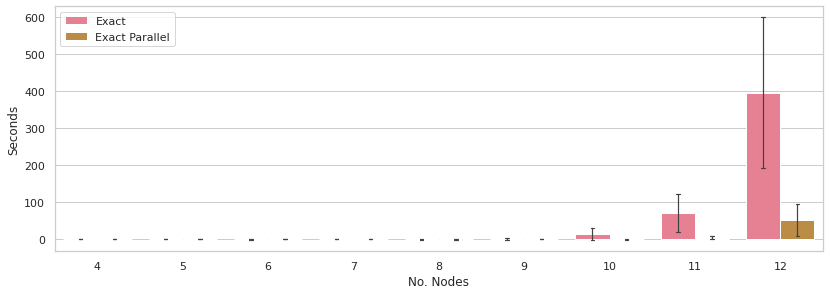

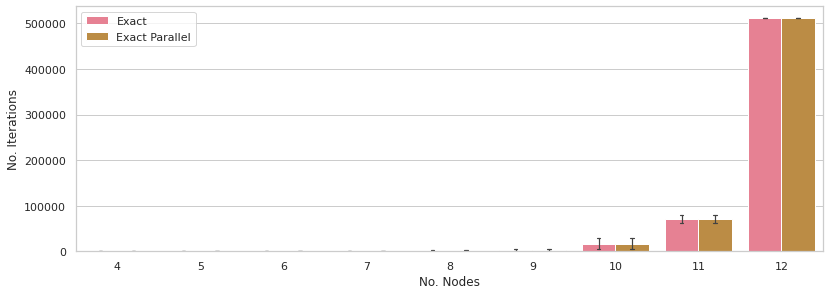

In [3]:
df_exact = read_result("./evaluation/evaluation_final/results_exact.txt", "Exact")
df_con_exact = read_result("./evaluation/evaluation_final/results_con_exact.txt", "Exact Parallel")

def fig1(y='time', name="Figure1_noNodes.pdf", ylabel="Seconds"):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(11.69,4.27))
    ax = sns.barplot(x="peafNodes", y=y,
                 hue='just_type', 
                 data=pd.concat([df_exact, df_con_exact]), **style, palette={'Exact':colors[0], 'Exact Parallel':colors[1]})
    ax.set_ylabel(ylabel)
    ax.set_xlabel("No. Nodes")
    ax.legend(title='')
    plt.tight_layout()
    plt.savefig(name)
    
fig1()
fig1(y="iteration",name="Figure1_noIterations.pdf", ylabel="No. Iterations")

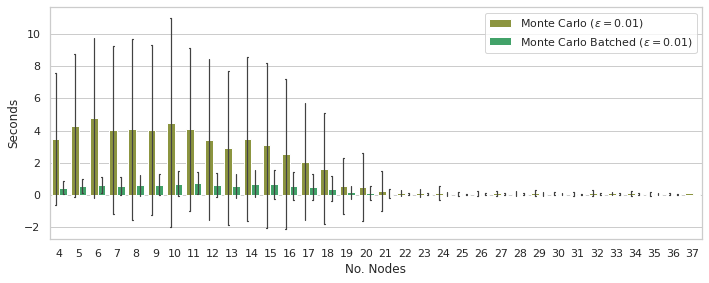

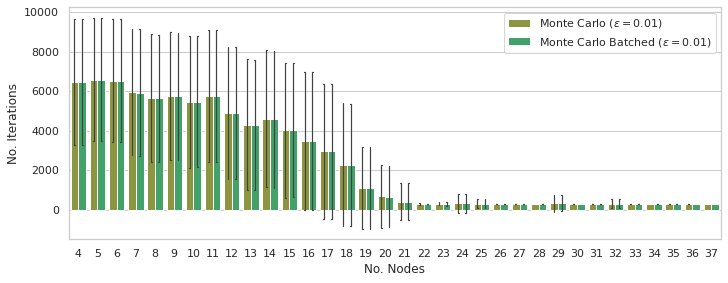

In [4]:
df_approx = read_result("./evaluation/evaluation_final/results_approx_0_01.txt", "Monte Carlo ($\epsilon = 0.01$)")
df_con_approx = read_result("./evaluation/evaluation_final/results_con_approx_0_01.txt", "Monte Carlo Batched ($\epsilon = 0.01$)")

def fig2(y="time", name="Figure2_noNodes.pdf", ylabel="Seconds"):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(11.69,4.27))
    ax = sns.barplot(x="peafNodes", y=y,
                 hue="just_type", 
                 data=pd.concat([df_approx, df_con_approx]), **style, palette=[colors[2], colors[3]])
    ax.set_ylabel(ylabel)
    ax.set_xlabel("No. Nodes")
    ax.legend(title='')
    plt.savefig(name)
    
fig2()
fig2(y="iteration", name="Figure2_noIterations.pdf", ylabel="No. Iterations")

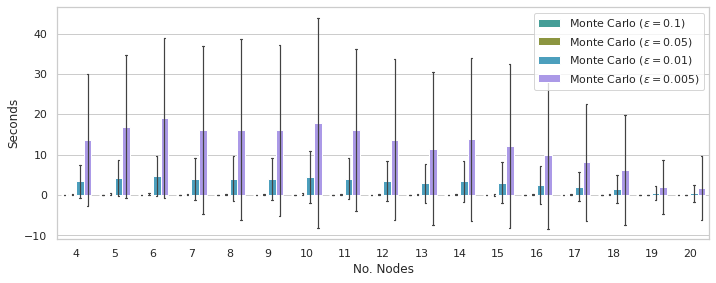

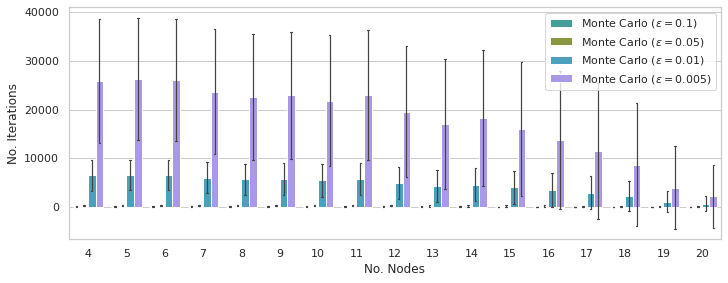

In [5]:
df_approx = read_result("./evaluation/evaluation_final/results_approx_0_1.txt", "Monte Carlo ($\epsilon = 0.1$)")
df_approx1 = read_result("./evaluation/evaluation_final/results_approx_0_05.txt", "Monte Carlo ($\epsilon = 0.05$)")
df_approx2 = read_result("./evaluation/evaluation_final/results_approx_0_01.txt", "Monte Carlo ($\epsilon = 0.01$)")
df_approx3 = read_result("./evaluation/evaluation_final/results_approx_0_005.txt", "Monte Carlo ($\epsilon = 0.005$)")

df_all = pd.concat([df_approx, df_approx1, df_approx2, df_approx3])

def fig3(y="time", name="Figure3_noNodes.pdf", ylabel="Seconds"):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(11.69,4.27))
    ax = sns.barplot(x="peafNodes", y=y,
                 hue="just_type", 
                 data=df_all[df_all["peafNodes"] < 21], **style, palette=[colors[4], colors[2], colors[5], colors[6]])
    ax.set_ylabel(ylabel)
    ax.set_xlabel("No. Nodes")
    ax.legend(title='')
    plt.savefig(name)
    
fig3()
fig3(y="iteration", name="Figure3_noIterations.pdf", ylabel="No. Iterations")

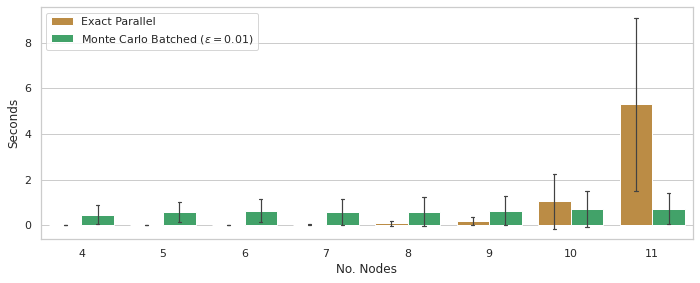

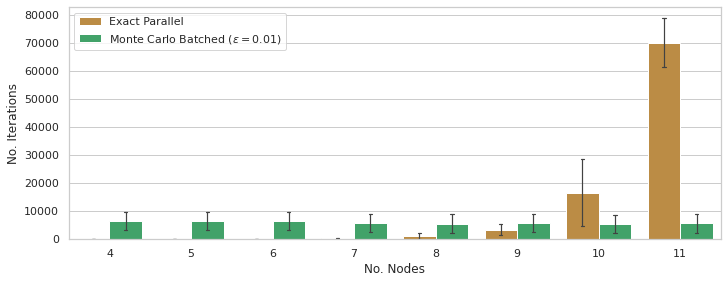

In [6]:

df_all = pd.concat([df_con_exact, df_con_approx])
sns.set_theme(style="whitegrid")

def fig4(y="time", name="Figure4_noNodes.pdf", ylabel="Seconds"):
    plt.figure(figsize=(11.69,4.27))
    ax = sns.barplot(x="peafNodes", y=y,
                 hue="just_type", 
                 data=df_all[df_all["peafNodes"] < 12], **style, palette=[colors[1], colors[3]])
    ax.set_ylabel(ylabel)
    ax.set_xlabel("No. Nodes")
    ax.legend(title='')
    plt.savefig(name)

fig4()
fig4(y="iteration", name="Figure4_noIterations.pdf", ylabel="No. Iterations")